In [1]:

import pandas as pd
import datetime
import torch
import math
import os
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


In [3]:
#引入归一化所需要的包
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [4]:
true = pd.read_csv('E:\ZGB\My-Time-series (2)\mydata\牛仔裤\optimal_modes_inorm_df.csv', index_col=None).T.reset_index(drop=True)

In [9]:

# true = pd.read_csv('E:\ZGB\My-Time-series (2)\mydata\牛仔裤\optimal_modes_inorm_df.csv', index_col=None).T.iloc[-100:, :].reset_index(drop=True)
true = pd.read_csv('E:\ZGB\My-Time-series (2)\mydata\牛仔裤\optimal_modes_inorm_df.csv', index_col=None).T.iloc[-100:, :].reset_index(drop=True)
scaler = MinMaxScaler((0, 1))
scaler.fit(true)


MinMaxScaler()

In [10]:
#生成一段时间，长度为len(df)的时间序列
prevmd_lstm=pd.read_csv('lstm/牛仔裤vmdpre1.csv',index_col=0).reset_index(drop=True)
prevmd_cnn=pd.read_csv('cnn/牛仔裤vmdpre.csv',index_col=0).reset_index(drop=True)
prevmd_rnn=pd.read_csv('rnn/牛仔裤vmdpre.csv',index_col=0).reset_index(drop=True)
prevmdada_lstm=pd.read_csv('lstm/牛仔裤vmdada_pre.csv',index_col=0).reset_index(drop=True)
prevmdada_cnn=pd.read_csv('cnn/牛仔裤vmdada_pre.csv',index_col=0).reset_index(drop=True)
prevmdada_rnn=pd.read_csv('rnn/牛仔裤vmdada_pre.csv',index_col=0).reset_index(drop=True)

import numpy as np



In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 计算绝对值误差
# abs_error_lstm = np.abs(true.values - prevmd_lstm.values)
# abs_error_cnn = np.abs(true.values - prevmd_cnn.values)
# abs_error_rnn = np.abs(true.values - prevmd_rnn.values)
# abs_error_lstmada = np.abs(true.values - prevmdada_lstm.values)
# abs_error_cnnada = np.abs(true.values - prevmdada_cnn.values)
# abs_error_rnnada = np.abs(true.values - prevmdada_rnn.values)
# 计算绝对值误差
abs_error_lstm = np.abs(true - prevmd_lstm)
abs_error_cnn = np.abs(true - prevmd_cnn)
abs_error_rnn = np.abs(true - prevmd_rnn)
abs_error_lstmada = np.abs(true - prevmdada_lstm)
abs_error_cnnada = np.abs(true - prevmdada_cnn)
abs_error_rnnada = np.abs(true - prevmdada_rnn)
# 计算每列的最大绝对值误差
max_abs_error_lstm = np.max(abs_error_lstm, axis=0)
max_abs_error_cnn = np.max(abs_error_cnn, axis=0)
max_abs_error_rnn = np.max(abs_error_rnn, axis=0)
max_abs_error_lstmada = np.max(abs_error_lstmada, axis=0)
max_abs_error_cnnada = np.max(abs_error_cnnada, axis=0)
max_abs_error_rnnada = np.max(abs_error_rnnada, axis=0)

# 计算每列的平均绝对值误差
avg_abs_error_lstm = np.mean(abs_error_lstm, axis=0)
avg_abs_error_cnn = np.mean(abs_error_cnn, axis=0)
avg_abs_error_rnn = np.mean(abs_error_rnn, axis=0)
avg_abs_error_lstmada = np.mean(abs_error_lstmada, axis=0)
avg_abs_error_cnnada = np.mean(abs_error_cnnada, axis=0)
avg_abs_error_rnnada = np.mean(abs_error_rnnada, axis=0)

# 计算每列的均方误差
# mse_lstm = mean_squared_error(true.values, prevmd_lstm.values, multioutput='raw_values')
# mse_cnn = mean_squared_error(true.values, prevmd_cnn.values, multioutput='raw_values')
# mse_rnn = mean_squared_error(true.values, prevmd_rnn.values, multioutput='raw_values')
# mse_lstmada = mean_squared_error(true.values, prevmdada_lstm.values, multioutput='raw_values')
# mse_cnnada = mean_squared_error(true.values, prevmdada_cnn.values, multioutput='raw_values')
# mse_rnnada = mean_squared_error(true.values, prevmdada_rnn.values, multioutput='raw_values')
mse_lstm = mean_squared_error(true, prevmd_lstm, multioutput='raw_values')
mse_cnn = mean_squared_error(true, prevmd_cnn, multioutput='raw_values')
mse_rnn = mean_squared_error(true, prevmd_rnn, multioutput='raw_values')
mse_lstmada = mean_squared_error(true, prevmdada_lstm, multioutput='raw_values')
mse_cnnada = mean_squared_error(true, prevmdada_cnn, multioutput='raw_values')
mse_rnnada = mean_squared_error(true, prevmdada_rnn, multioutput='raw_values')
# 输出结果
result = pd.DataFrame({
    'LSTM': [max_abs_error_lstm, avg_abs_error_lstm, mse_lstm],
    'CNN': [max_abs_error_cnn, avg_abs_error_cnn, mse_cnn],
    'RNN': [max_abs_error_rnn, avg_abs_error_rnn, mse_rnn],
    'LSTM with Adaptive Learning Rate': [max_abs_error_lstmada, avg_abs_error_lstmada, mse_lstmada],
    'CNN with Adaptive Learning Rate': [max_abs_error_cnnada, avg_abs_error_cnnada, mse_cnnada],
    'RNN with Adaptive Learning Rate': [max_abs_error_rnnada, avg_abs_error_rnnada, mse_rnnada]
}, index=['Max Absolute Error', 'Average Absolute Error', 'Mean Squared Error'])
print(result)

                                                                     LSTM  \
Max Absolute Error      [0.08961776131105958, 0.03810311019114043, 0.1...   
Average Absolute Error  [0.044501129215017504, 0.017875280120353675, 0...   
Mean Squared Error      [0.002335317755199405, 0.0003891188992816079, ...   

                                                                      CNN  \
Max Absolute Error      [0.05202500781151942, 0.11660609595725063, 0.0...   
Average Absolute Error  [0.02565195620965935, 0.02939171674617575, 0.0...   
Mean Squared Error      [0.0008768492403000102, 0.0015771946637764462,...   

                                                                      RNN  \
Max Absolute Error      [0.2703771150364789, 0.7128849996703334, 0.785...   
Average Absolute Error  [0.1441144792052768, 0.12333646748991939, 0.17...   
Mean Squared Error      [0.027515138210771943, 0.0295274666825255, 0.0...   

                                         LSTM with Adaptive Learning Rate

In [15]:
import pandas as pd

# 构造 DataFrame
df_error_lstm = pd.DataFrame({
    'Max Absolute Error': max_abs_error_lstm,
    'Average Absolute Error': avg_abs_error_lstm,
    'Mean Squared Error': mse_lstm
})

df_error_cnn = pd.DataFrame({
    'Max Absolute Error': max_abs_error_cnn,
    'Average Absolute Error': avg_abs_error_cnn,
    'Mean Squared Error': mse_cnn
})

df_error_rnn = pd.DataFrame({
    'Max Absolute Error': max_abs_error_rnn,
    'Average Absolute Error': avg_abs_error_rnn,
    'Mean Squared Error': mse_rnn
})

df_error_lstmada = pd.DataFrame({
    'Max Absolute Error': max_abs_error_lstmada,
    'Average Absolute Error': avg_abs_error_lstmada,
    'Mean Squared Error': mse_lstmada
})

df_error_cnnada = pd.DataFrame({
    'Max Absolute Error': max_abs_error_cnnada,
    'Average Absolute Error': avg_abs_error_cnnada,
    'Mean Squared Error': mse_cnnada
})

df_error_rnnada = pd.DataFrame({
    'Max Absolute Error': max_abs_error_rnnada,
    'Average Absolute Error': avg_abs_error_rnnada,
    'Mean Squared Error': mse_rnnada
})

# 保存为 CSV 文件
df_error_lstm.to_csv('table/1error_metrics_lstm.csv', index=False)
df_error_cnn.to_csv('table/1error_metrics_cnn.csv', index=False)
df_error_rnn.to_csv('table/1error_metrics_rnn.csv', index=False)
df_error_lstmada.to_csv('table/1error_metrics_lstmada.csv', index=False)
df_error_cnnada.to_csv('table/1error_metrics_cnnada.csv', index=False)
df_error_rnnada.to_csv('table/1error_metrics_rnnada.csv', index=False)


In [8]:
hex_color_codes = [
    '#e68193', '#d8824a', '#b38e44', '#999240', '#7d9a40', '#417a4d', '#459e97', '#489eaa','#4f9fc6','#479faa','#8fa0e6', '#bf8ee6', '#e270db','#e070d9'
]

# Converting hexadecimal color codes to a list of colors
colors = [tuple(int(code[i:i+2], 16) / 255.0 for i in (1, 3, 5)) for code in hex_color_codes]

# print(colors_list)

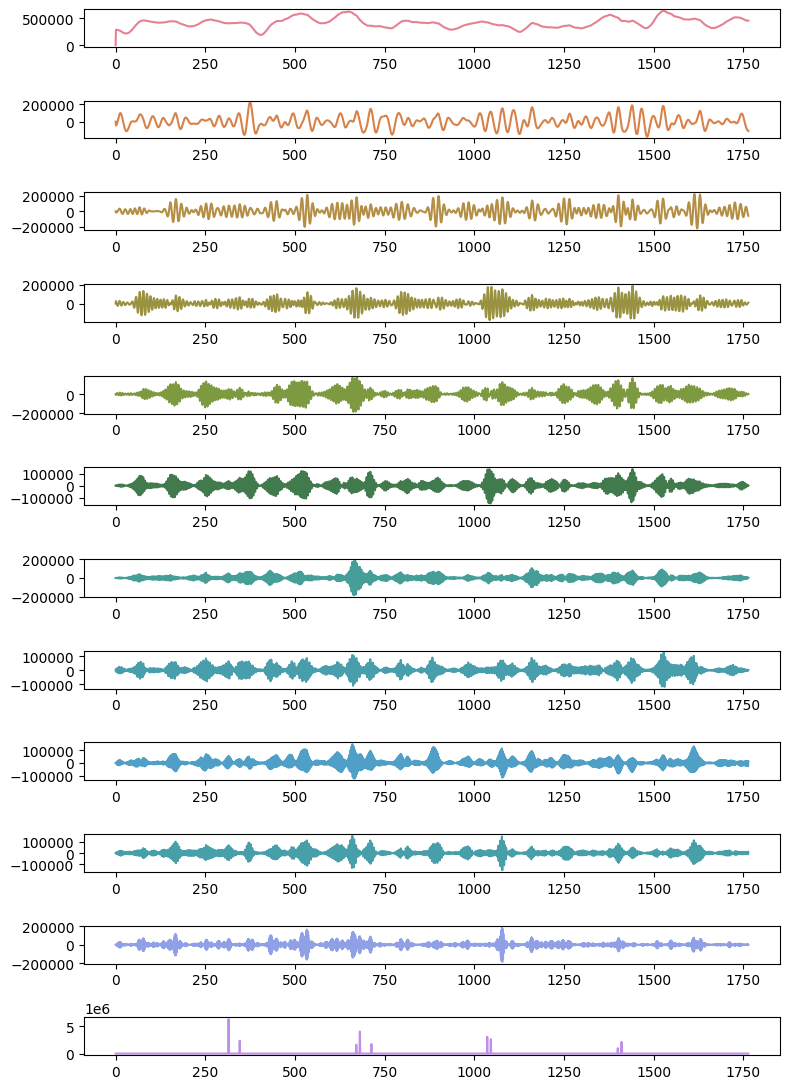

In [14]:
# for pre in [prevmd_lstm,prevmd_cnn,prevmd_rnn,prevmdada_lstm,prevmdada_cnn,prevmdada_rnn]:
fig = plt.figure(figsize=(8, 11))
for i,color in zip(true.columns,colors):
    ax = fig.add_subplot(len(true.columns), 1, int(i) + 1)
    ax.plot(true[i],color=color)
    # ax.plot(pre[str(i)], label='pre',color=colors[i])
    # if i!=len(true.columns)-1:
    #     ax.set_title('IMF' + str(i))
    # else:
    #     ax.set_title('Resid')
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    # ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    # 图例位置在ax右侧，不遮挡图像
    # ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
# plt.legend(['domain'+str(i+1) for i in range(1, domain)])
#
plt.tight_layout()
# if pre is prevmd_lstm:
#     plt.savefig('img/lstm_牛仔裤vmdpre.png')
# elif pre is prevmd_cnn:
#     plt.savefig('img/cnn_牛仔裤vmdpre.png')
# elif pre is prevmd_rnn:
#     plt.savefig('img/rnn_牛仔裤vmdpre.png')
# elif pre is prevmdada_lstm:
#     plt.savefig('img/lstm_牛仔裤vmdada_pre.png')
# elif pre is prevmdada_cnn:
#     plt.savefig('img/cnn_牛仔裤vmdada_pre.png')
# elif pre is prevmdada_rnn:
#     plt.savefig('img/rnn_牛仔裤vmdada_pre.png')
# # plt.savefig(f'vmd/{mode}_{domain}_{dis}.png')
# # Display the combined figure
#保存为矢量图
plt.savefig('img/牛仔裤vmd.svg', format='svg')
plt.show()

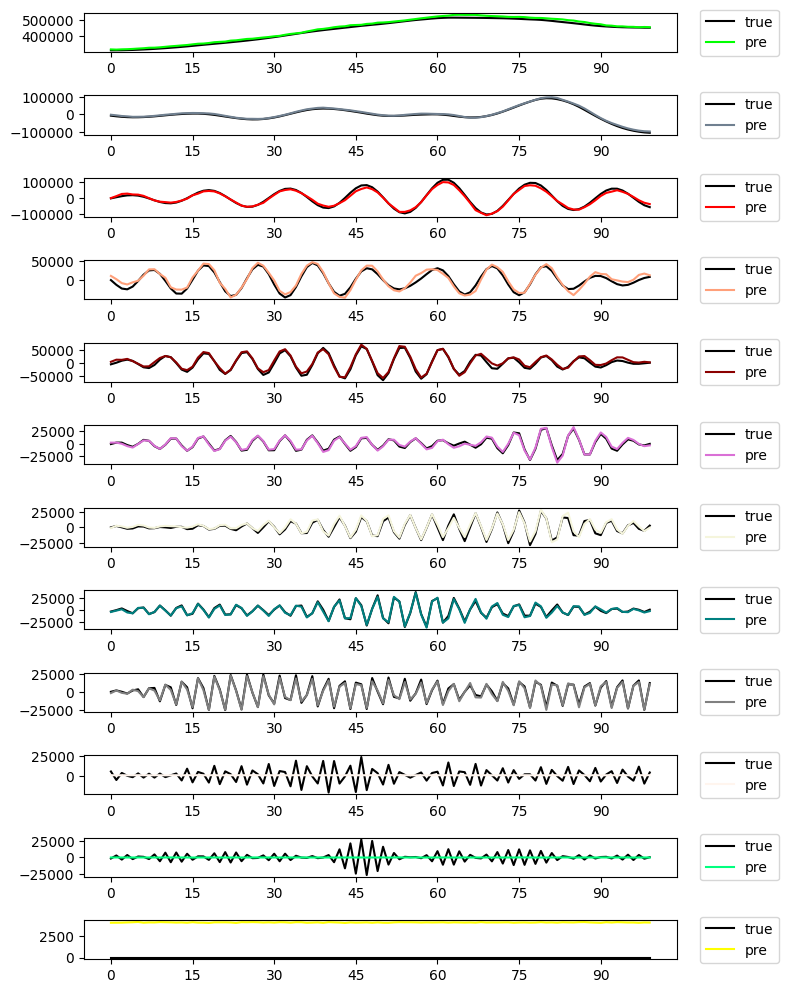

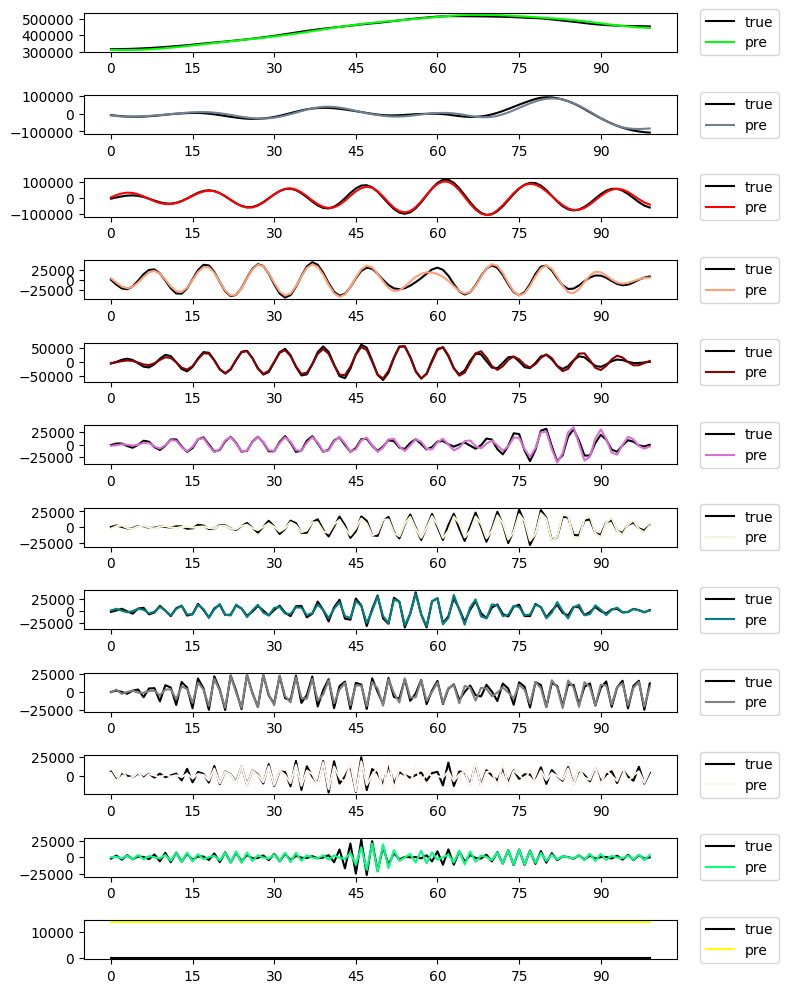

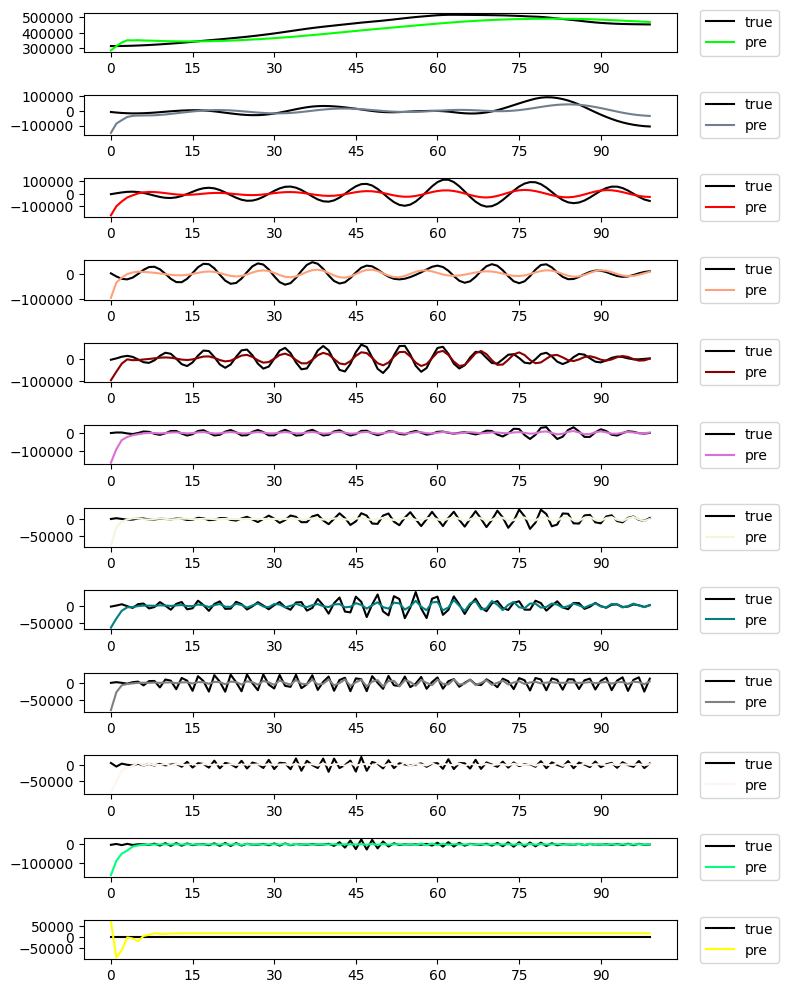

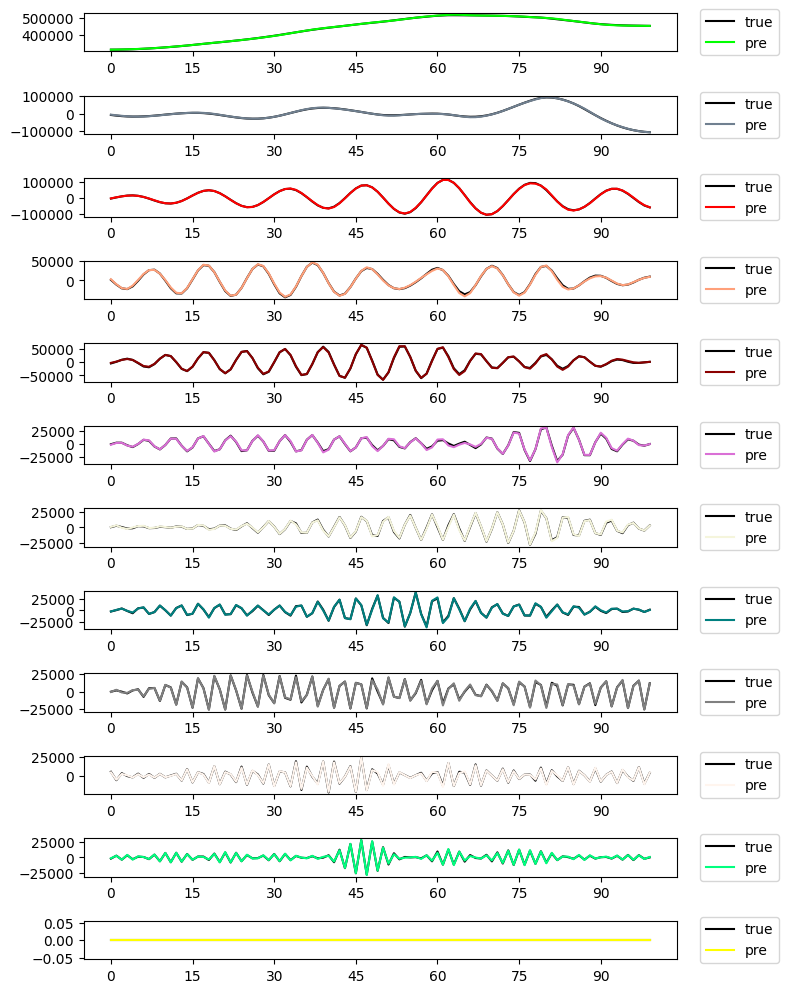

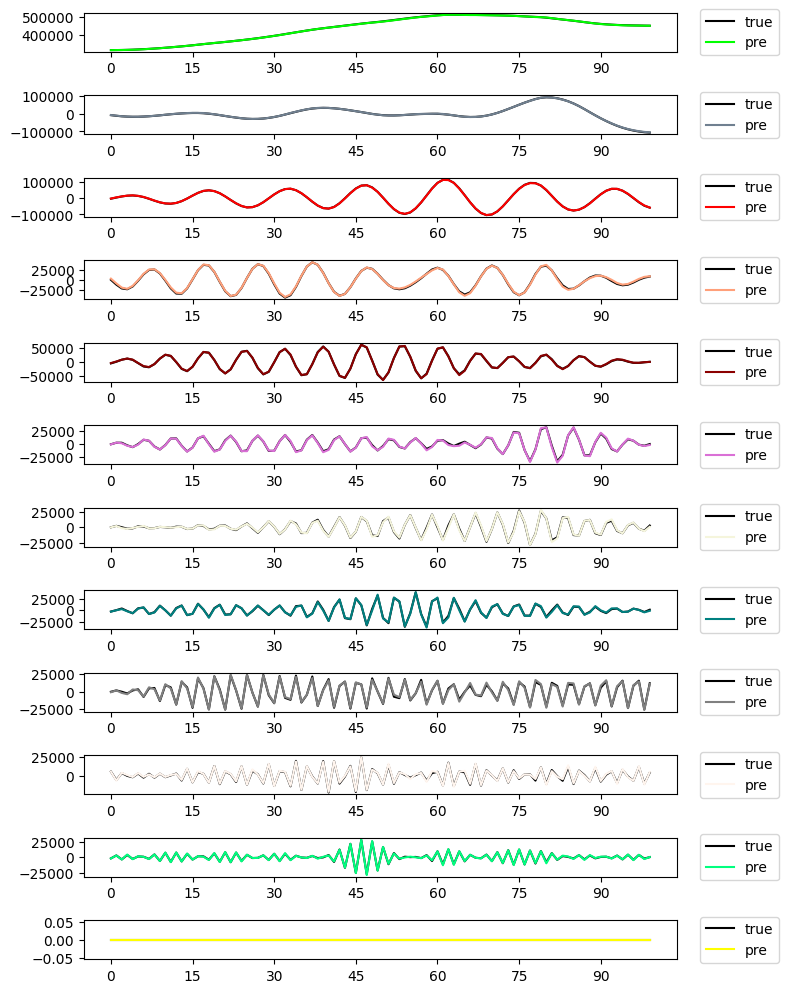

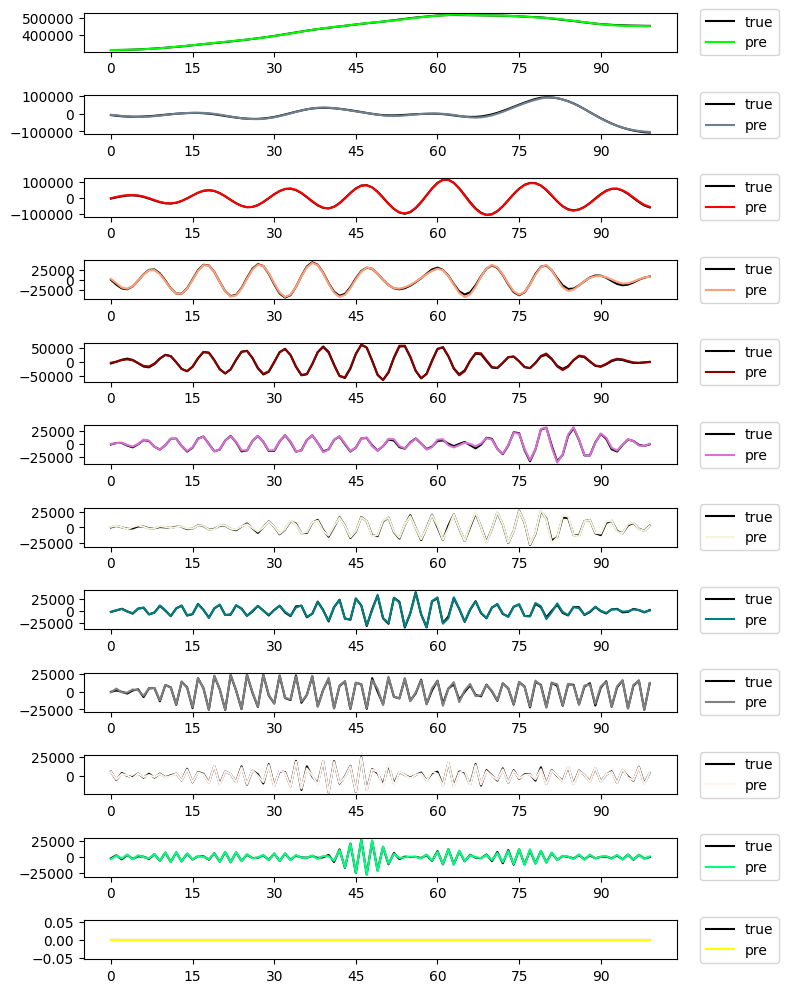

In [101]:

for pre in [prevmd_lstm,prevmd_cnn,prevmd_rnn,prevmdada_lstm,prevmdada_cnn,prevmdada_rnn]:
    fig = plt.figure(figsize=(8, 10))
    for i in true.columns:
        ax = fig.add_subplot(len(true.columns), 1, int(i) + 1)
        ax.plot(true[i], label='true',color='black')
        ax.plot(pre[str(i)], label='pre',color=colors[i])
        # if i!=len(true.columns)-1:
        #     ax.set_title('IMF' + str(i))    
        # else:
        #     ax.set_title('Resid')
        ax.xaxis.set_major_locator(plt.MaxNLocator(8))
        # ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        # 图例位置在ax右侧，不遮挡图像
        # ax.title.set_position([-0.12, -1])  # Set position to the left and slightly up from the center
        # ax.title.set_rotation(90)  # Rotate title
        # ax.title.set_horizontalalignment('center')  # Set alignment
        ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
        
    # plt.legend(['domain'+str(i+1) for i in range(1, domain)])
    plt.tight_layout()
    if pre is prevmd_lstm:
        plt.savefig('img/lstm_牛仔裤vmdpre.png')
    elif pre is prevmd_cnn:
        plt.savefig('img/cnn_牛仔裤vmdpre.png')
    elif pre is prevmd_rnn:
        plt.savefig('img/rnn_牛仔裤vmdpre.png')
    elif pre is prevmdada_lstm:
        plt.savefig('img/lstm_牛仔裤vmdada_pre.png')
    elif pre is prevmdada_cnn:
        plt.savefig('img/cnn_牛仔裤vmdada_pre.png')
    elif pre is prevmdada_rnn:
        plt.savefig('img/rnn_牛仔裤vmdada_pre.png')
    # plt.savefig(f'vmd/{mode}_{domain}_{dis}.png')
    # Display the combined figure
    plt.show()

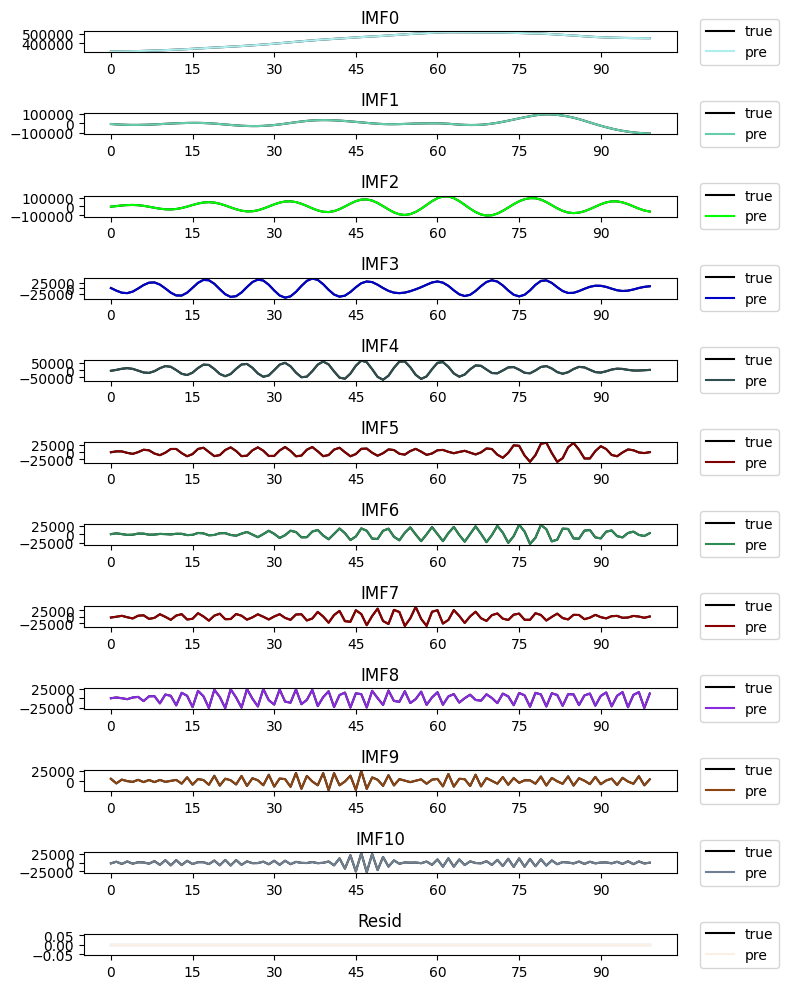

In [26]:
#将循环中的图绘制在一张图上
lines = []
labels = []
fig = plt.figure(figsize=(8, 10))
for i in true.columns:
    ax = fig.add_subplot(len(true.columns), 1, int(i) + 1)
    ax.plot(true[i], label='true',color='black')
    ax.plot(pre[str(i)], label='pre',color=colors[i])
    if i!=len(true.columns)-1:
        ax.set_title('IMF' + str(i))
    else:
        ax.set_title('Resid')
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    # ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    # 图例位置在ax右侧，不遮挡图像
    ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    
    

# plt.legend(['domain'+str(i+1) for i in range(1, domain)])
plt.tight_layout()
# plt.savefig(f'vmd/{mode}_{domain}_{dis}.png')
# Display the combined figure
plt.show()      